## Loan Status Prediction

In [48]:
#import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [49]:
#importing dataset
df_loan= pd.read_csv(r"C:\Users\sahas\Downloads\loan_data.csv")

In [50]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [51]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [79]:
(df_loan.isnull().sum()/len(df_loan))*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [57]:
#imputing missing values for Gender column
df_loan['Gender']=df_loan['Gender'].fillna(df_loan['Gender'].mode()[0])

In [61]:
##imputing missing values for Dependents column
df_loan['Dependents']=df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0])

In [65]:
#imputing missing values for Self Employed column
df_loan['Self_Employed']=df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0])

In [73]:
#imputing missing values for Loan_Amount_Term column
df_loan['Loan_Amount_Term']=df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].median())

In [77]:
#imputing missing values for Credit_History column
df_loan['Credit_History']=df_loan['Credit_History'].fillna(df_loan['Credit_History'].median())

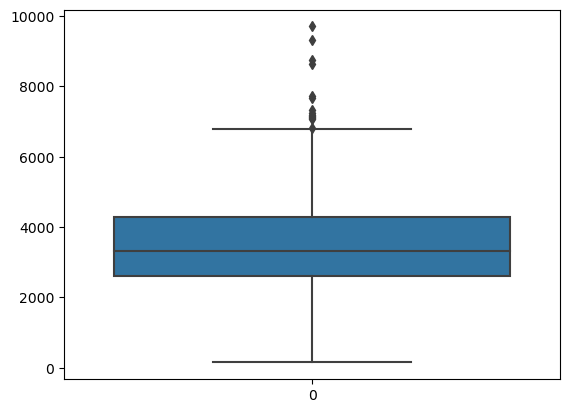

In [81]:
#looking for outliers in the dataset
sns.boxplot(df_loan['ApplicantIncome'])
plt.show()

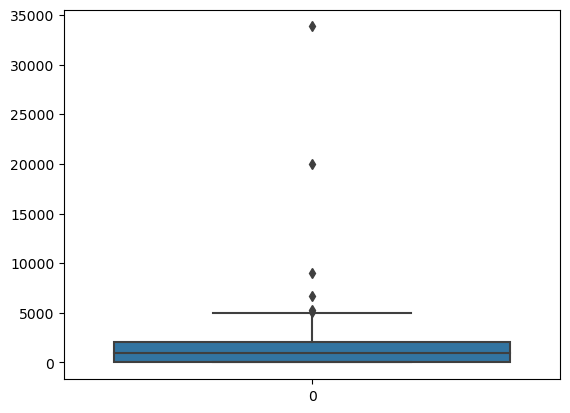

In [82]:
sns.boxplot(df_loan['CoapplicantIncome'])
plt.show()

### Replacing Categorical Variables with Numerical Variables

In [111]:
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,0,1


In [99]:
#replacing Gender column with numerical variables
df_loan['Gender'] = df_loan['Gender'].map({'Male':1,'Female':0})

In [101]:
#replacing Married column with numerical variables
df_loan['Married'] = df_loan['Married'].map({'Yes':1,'No':0})

In [102]:
#replacing Education column with numerical variables
df_loan['Education'] = df_loan['Education'].map({'Graduate':1,'Not Graduate':0})

In [103]:
#replacing Self_Employed column with numerical variables
df_loan['Self_Employed'] = df_loan['Self_Employed'].map({'Yes':1,'No':0})

In [104]:
#replacing Loan_Status column with numerical variables
df_loan['Loan_Status'] = df_loan['Loan_Status'].map({'Y':1,'N':0})

In [106]:
#replacing Dependents column with numerical variables
df_loan['Dependents'] = df_loan['Dependents'].replace(['0','1','2','3+'],['0','1','2','3'])

In [108]:
dummy1= pd.get_dummies(df_loan['Property_Area'],drop_first=True)
df_loan = pd.concat([df_loan,dummy1],axis=1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,1,1,3,1,0,5703,0.0,128.0,360.0,1.0,1,0,1
377,LP002974,1,1,0,1,0,3232,1950.0,108.0,360.0,1.0,1,0,0
378,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,0,0
379,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,0,0


In [110]:
df_loan = df_loan.drop(['Property_Area'],axis=1)

## Data Visualization

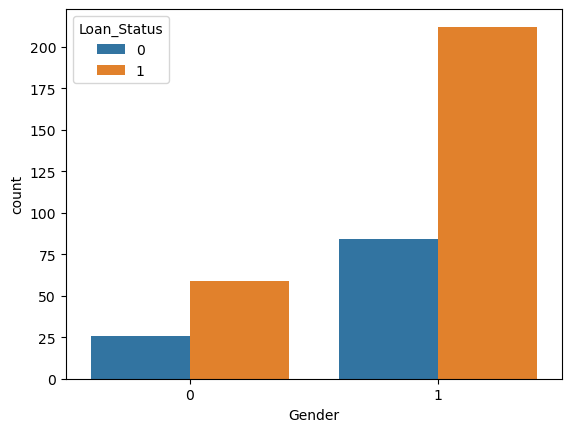

In [112]:
sns.countplot(x=df_loan['Gender'],hue=df_loan['Loan_Status'])
plt.show()

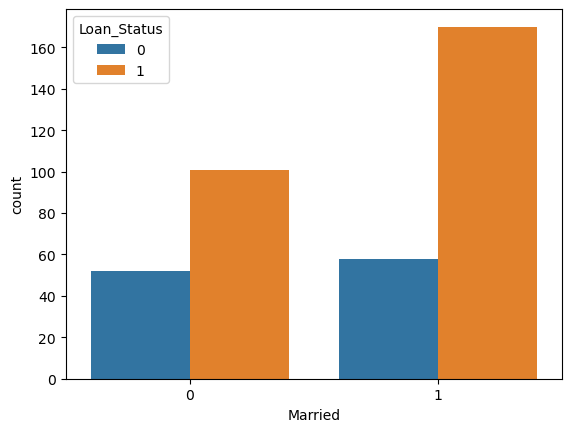

In [113]:
sns.countplot(x=df_loan['Married'],hue=df_loan['Loan_Status'])
plt.show()

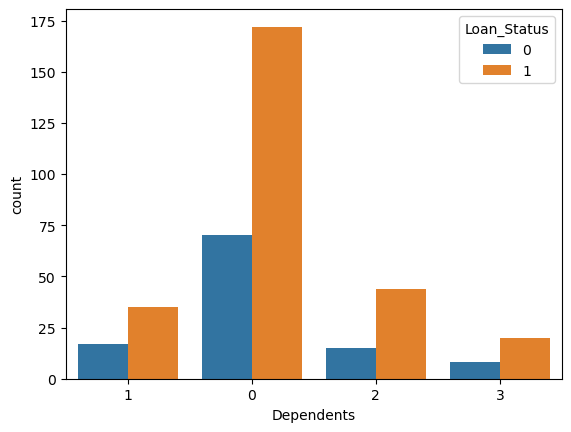

In [114]:
sns.countplot(x=df_loan['Dependents'],hue=df_loan['Loan_Status'])
plt.show()

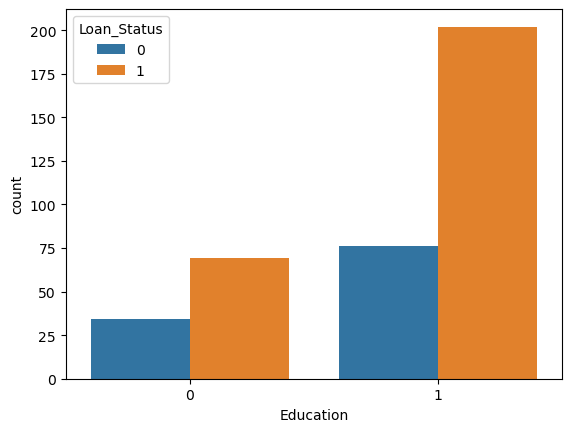

In [115]:
sns.countplot(x=df_loan['Education'],hue=df_loan['Loan_Status'])
plt.show()

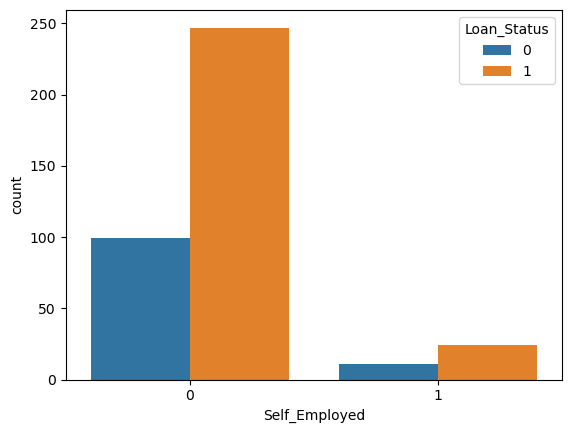

In [118]:
sns.countplot(x=df_loan['Self_Employed'],hue=df_loan['Loan_Status'])
plt.show()

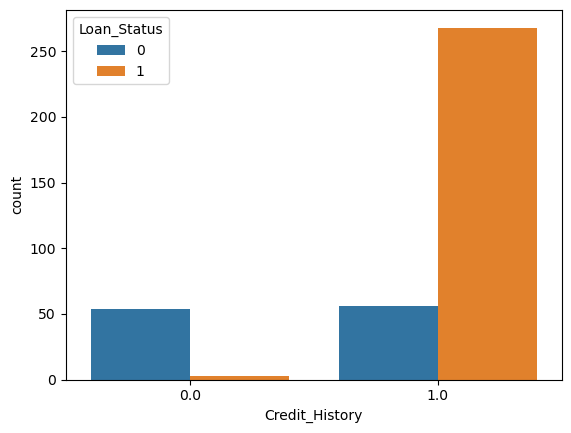

In [119]:
sns.countplot(x=df_loan['Credit_History'],hue=df_loan['Loan_Status'])
plt.show()

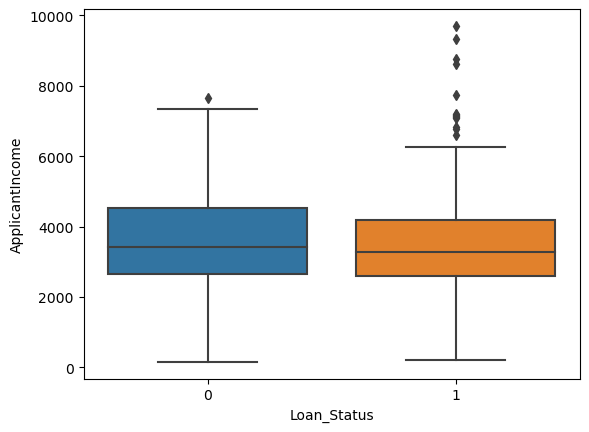

In [117]:
sns.boxplot(data=df_loan,x='Loan_Status',y='ApplicantIncome')
plt.show()

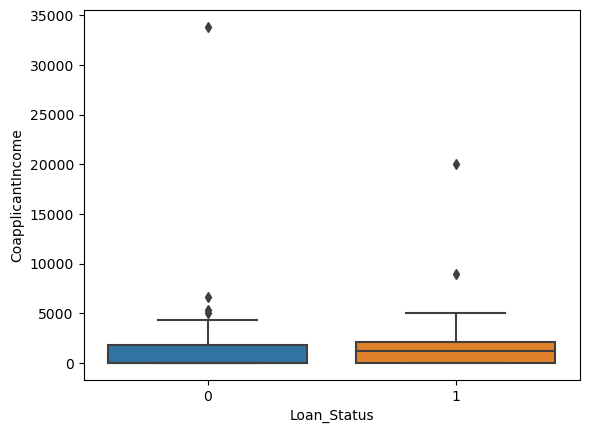

In [120]:
sns.boxplot(data=df_loan,x='Loan_Status',y='CoapplicantIncome')
plt.show()

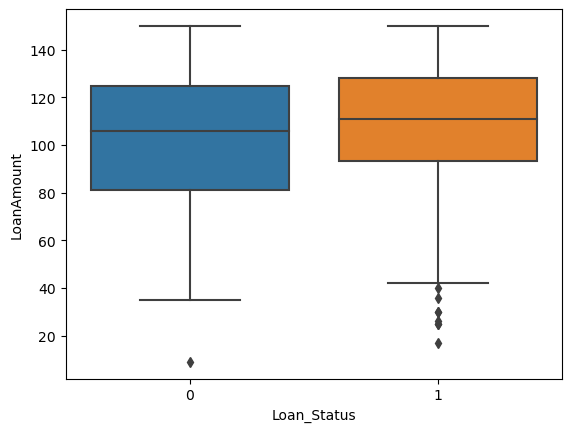

In [122]:
sns.boxplot(data=df_loan,x='Loan_Status',y='LoanAmount')
plt.show()

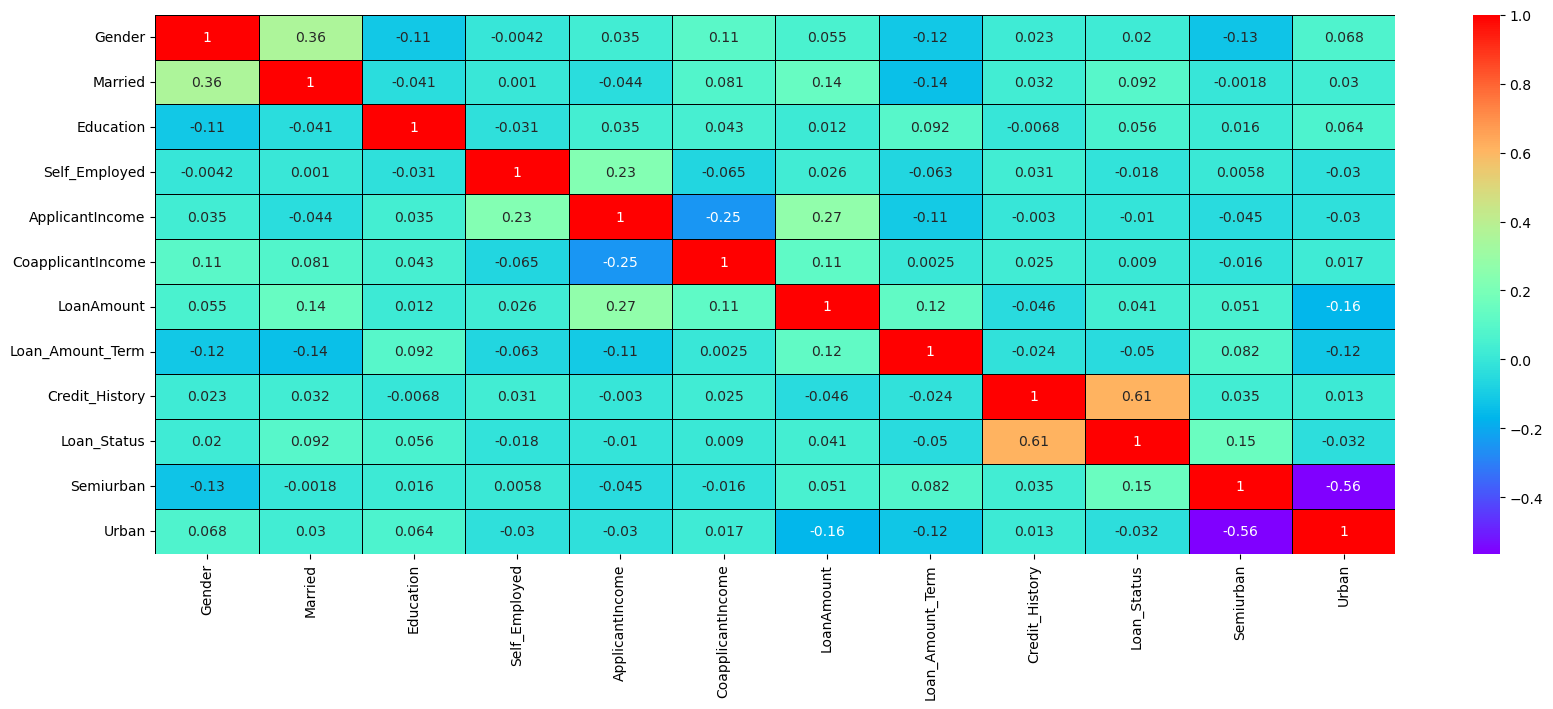

In [129]:
plt.figure(figsize=[20,7])
sns.heatmap(df_loan.corr(),cmap='rainbow',annot=True, linecolor='black',linewidths=.5)
plt.show()

## Data Preprocessing

In [131]:
X = df_loan.drop(['Loan_ID','Loan_Status'],axis =1)
y = df_loan['Loan_Status']

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [135]:
#scaling the numerical variables
from sklearn.preprocessing import MinMaxScaler

In [136]:
scaler = MinMaxScaler()
X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.fit_transform(X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaler.transform(X_test[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

## Model Building

### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lr = LogisticRegression()

In [140]:
lr.fit(X_train,y_train)

LogisticRegression()

In [142]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [144]:
#evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_lr))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_lr))

Test Accuracy Score:  0.8181818181818182
Confusion Matrix:
[[ 7 14]
 [ 0 56]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



### Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf =35)

In [148]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=35)

In [149]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

In [150]:
print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_dt))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_dt))

Test Accuracy Score:  0.8181818181818182
Confusion Matrix:
[[ 7 14]
 [ 0 56]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77



### Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 3, min_samples_leaf=20)

In [157]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=20)

In [158]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [159]:
print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_rf))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_rf))

Test Accuracy Score:  0.7662337662337663
Confusion Matrix:
[[ 3 18]
 [ 0 56]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        21
           1       0.76      1.00      0.86        56

    accuracy                           0.77        77
   macro avg       0.88      0.57      0.56        77
weighted avg       0.82      0.77      0.69        77



## Hyperparameter Tuning

In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
hyper_params = {'max_depth': [2, 3, 5, 7],
                'min_samples_split': [10, 15, 20, 25, 30],
                'min_samples_leaf': [20, 30, 40, 50],
                'n_estimators': [10, 25, 50, 80, 100]
               }

In [162]:
model_cv = GridSearchCV(estimator = rf,param_grid= hyper_params, verbose=1,cv=5,n_jobs=-1,return_train_score=True)

In [164]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, min_samples_leaf=20),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7],
                         'min_samples_leaf': [20, 30, 40, 50],
                         'min_samples_split': [10, 15, 20, 25, 30],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [165]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=20, min_samples_split=20,
                       n_estimators=10)

In [166]:
model_cv.best_score_

0.8126229508196721

In [167]:
rf_ht = model_cv.best_estimator_

In [168]:
y_test_pred_ht = rf_ht.predict(X_test)

In [169]:
print("Test Accuracy Score: ",accuracy_score(y_test,y_test_pred_ht))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_test_pred_ht))
print("Classification Report:")
print(classification_report(y_test,y_test_pred_ht))

Test Accuracy Score:  0.8181818181818182
Confusion Matrix:
[[ 7 14]
 [ 0 56]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.80      1.00      0.89        56

    accuracy                           0.82        77
   macro avg       0.90      0.67      0.69        77
weighted avg       0.85      0.82      0.78        77

